In [216]:
import numpy as np
import matplotlib.pyplot as plt

**Задача №6.1.1**

Функция $ y = f(x) $ задана таблицей значений $ y_{0}, y_{1}, \dots, y_{n} $ в точках $ x_{0}, x_{1}, \dots, x_{n} $. Используя метод наименьших квадратов (МНК), найти многочлен 
$$ P_{m}(x) = a_{0} + a_{1} x + \dots + a_{m} x^{m} $$ 
наилучшего среднеквадратичного приближения оптимальной степени $ m = m^{*} $. За оптимальное значение $ m^{*} $ принять ту степень многочлена, начиная с которой величина 
$$ \sigma_{m} = \sqrt{\frac{1}{n - m} \sum\limits_{k = 0}^{n}{\left( P_{m}(x_{k}) - y_{k} \right)^{2}}} $$ 
стабилизируется или начинает возрастать.

1. Задаём векторы $ \vec{x} $ и $ \vec{y} $ исходных данных.

In [323]:
x = np.array([-1, -0.7, -0.43, -0.14, 0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3])
y = np.array([-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90])

$$
\vec{x} = 
\begin{bmatrix}
    x_{1} \\
    x_{2} \\
    \vdots \\
    x_{n}
\end{bmatrix} \in \mathbb{R}^{n}
$$

$$ 
\vec{x} = \left( x_1, x_2, \dots, x_n \right), 
\, 
\vec{y} = \left( y_1, y_2, \dots, y_n \right), 
\, 
\vec{a} = \left( a_0, a_1, \dots, a_m \right) 
\\ 
P_m(x, \vec{a}) 
= 
a_0 + a_1 x + \dots + a_m x^m 
= 
\sum_{k=0}^{m}{a_k x^k} 
\\ 

S(\vec{x}, \vec{y}, \vec{a}) 
= 
\sum_{i = 1}^{n}{\left( P_m(x_i, \vec{a}) - y_i \right)^2} \rightarrow \min 
\iff
\begin{cases} 
    \frac{\partial{S}}{\partial{a_{0}}} = 0 \\
    \dots \\
    \frac{\partial{S}}{\partial{a_{m}}} = 0
\end{cases} 
\\
\frac{\partial{S}}{\partial{a_k}} 
= 
\frac{\partial}{\partial{a_k}}
{
    \left[ 
        \sum_{i = 1}^{n}
        {
            \left( 
                P_m(x_i, \vec{a}) - y_i 
            \right)^2
        } 
    \right]
} 
= 
\sum_{i = 1}^{n}
{
    \frac{\partial}{\partial{a_k}}
    {
        \left[ 
            \left( 
                P_m(x_i, \vec{a}) - y_i 
            \right)^2 
        \right]
    }
} 
= \\ = 
\sum_{i = 1}^{n}
{
    2 
    \left( 
        P_m(x_i, \vec{a}) - y_i 
    \right) 
    \frac{\partial}{\partial{a_k}}
    {
        \left[ 
            P_m(x_i, \vec{a}) - y_i 
        \right]
    }
} 
= 
2 
\sum_{i = 1}^{n}
{
    \left( 
        P_m(x_i, \vec{a}) - y_i 
    \right) 
    \frac{\partial{P_m}}{\partial{a_k}}
    {
        \left(
            x_i, 
            \vec{a}
        \right)
    }
} 
= \\ = 
2 
\sum_{i = 1}^{n}
{
    \left( 
        \sum_{j=0}^{m}
        {
            a_j x_i^j
        } 
        - y_i 
    \right) 
    \frac{\partial}{\partial{a_k}}
    {
        \left[ 
            \sum_{j=0}^{m}
            {
                a_j x_i^j
            } 
        \right]
    }
} 
= 
2 
\sum_{i = 1}^{n}
{
    \left( 
        \sum_{j=0}^{m}
        {
            a_j x_i^j
        } 
        - y_i 
    \right) 
    x_i^k 
} 
= \\ = 
2 
\left( 
    \sum_{j=0}^{m}
    {
        a_j 
        \sum_{i = 1}^{n}
        {
            x_i^{k + j}
        } 
    } 
    - 
    \sum_{i = 1}^{n}
    {
        x_i^k y_i 
    } 
\right) 
= 0 
\iff 
\sum_{j=0}^{m}
{
    a_j 
    \sum_{i = 1}^{n}
    {
        x_i^{k + j}
    } 
} 
= 
\sum_{i = 1}^{n}
{
    x_i^k y_i 
} 
\\

\sum_{i = 1}^{n}{x_i^{k}} a_0 + 
\sum_{i = 1}^{n}{x_i^{k + 1}} a_1 + 
\dots + 
\sum_{i = 1}^{n}{x_i^{k + m}} a_m = 
\sum_{i = 1}^{n}{x_i^k y_i}, 
\, 
k = 0, \, 1, \, \dots, \, {m - 1}, \, m.
$$

$$
\begin{cases} 
    \frac{\partial{S}}{\partial{a_{0}}} = 0 \\
    \frac{\partial{S}}{\partial{a_{1}}} = 0 \\
    \dots \\
    \frac{\partial{S}}{\partial{a_{m}}} = 0
\end{cases} 
\iff 
\begin{pmatrix}
    n                                   & \sum\limits_{i = 1}^{n}{x_{i}}            & \dots     & \sum\limits_{i = 1}^{n}{x_{i}^{m}}        \\
    \sum\limits_{i = 1}^{n}{x_{i}}      & \sum\limits_{i = 1}^{n}{x_{i}^{2}}        & \dots     & \sum\limits_{i = 1}^{n}{x_{i}^{m + 1}}    \\
    \vdots                              & \vdots                                    & \ddots    & \vdots                                    \\
    \sum\limits_{i = 1}^{n}{x_{i}^{m}}  & \sum\limits_{i = 1}^{n}{x_{i}^{m + 1}}    & \dots     & \sum\limits_{i = 1}^{n}{x_{i}^{2 m}}      \\
\end{pmatrix} 
\begin{pmatrix}
    a_{0}   \\
    a_{1}   \\
    \vdots  \\
    a_{m}
\end{pmatrix} = 
\begin{pmatrix}
    \sum\limits_{i = 1}^{n}{y_{i}} \\
    \sum\limits_{i = 1}^{n}{x_{i} y_{i}}\\
    \vdots \\
    \sum\limits_{i = 1}^{n}{x_{i}^{m} y_{i}}
\end{pmatrix} 
\iff \\ \iff 
\vec{a} = 
\begin{pmatrix}
    a_{0}   \\
    a_{1}   \\
    \vdots  \\
    a_{m}
\end{pmatrix} = 
\begin{pmatrix}
    n                                   & \sum\limits_{i = 1}^{n}{x_{i}}            & \dots     & \sum\limits_{i = 1}^{n}{x_{i}^{m}}        \\
    \sum\limits_{i = 1}^{n}{x_{i}}      & \sum\limits_{i = 1}^{n}{x_{i}^{2}}        & \dots     & \sum\limits_{i = 1}^{n}{x_{i}^{m + 1}}    \\
    \vdots                              & \vdots                                    & \ddots    & \vdots                                    \\
    \sum\limits_{i = 1}^{n}{x_{i}^{m}}  & \sum\limits_{i = 1}^{n}{x_{i}^{m + 1}}    & \dots     & \sum\limits_{i = 1}^{n}{x_{i}^{2 m}}      \\
\end{pmatrix}^{-1} 
\begin{pmatrix}
    \sum\limits_{i = 1}^{n}{y_{i}} \\
    \sum\limits_{i = 1}^{n}{x_{i} y_{i}}\\
    \vdots \\
    \sum\limits_{i = 1}^{n}{x_{i}^{m} y_{i}}
\end{pmatrix} 
$$

$$
S(\vec{x}, \vec{y}, \vec{\alpha}) = 
\sum\limits_{k = 1}^{n}
{
    \left(
        f(x_{k}, \vec{\alpha}) - y_{k}
    \right)^{2}
} \rightarrow \min 
\iff 
\frac
{
    \partial{
        S
    }
}
{
    \partial{
        \vec{\alpha}
    }
} = 
\vec{0} 
\\ 
\frac{\partial{S}}{\partial{\alpha_{i}}} 
= 
\frac{\partial}{\partial{\alpha_{i}}}
\left[
    \sum\limits_{k = 1}^{n}
    {
        \left(
            f(x_{k}, \vec{\alpha}) - y_{k}
        \right)^{2}
    }
\right] 
= 
\sum\limits_{k = 1}^{n}
{
    2 
    \left(
        f(x_{k}, \vec{\alpha}) - y_{k}
    \right)
}
\frac{\partial}{\partial{\alpha_{i}}}
\left[
    f(x_{k}, \vec{\alpha}) - y_{k}
\right] 
= 
2
\sum\limits_{k = 1}^{n}
{
    \left(
        f(x_{k}, \vec{\alpha}) - y_{k}
    \right) 
    \frac{\partial{f}}{\partial{\alpha_{i}}}
    {
        (x_{k}, \vec{\alpha})
    }
}
$$

$$
f(x, \vec{\alpha}) 
% = 
% \alpha_{0} + \alpha_{1} x + \alpha_{2} x^{2} + \dots + \alpha_{m - 1} x^{m - 1} + \alpha_{m} x^{m} 
= 
\sum\limits_{j = 0}^{m}{
    \alpha_{j} x^{j} 
}
\implies 
\frac{\partial{f}}{\partial{\alpha_{i}}}
{
    \left( 
        x, 
        \vec{\alpha} 
    \right) 
} 
= 
\frac{\partial}{\partial{\alpha_{i}}}
{
    \left[ 
        \alpha_{i} x^{i} 
    \right] 
} 
= 
x^{i} 
$$

$$
\frac{
    \partial{S}
}{
    \partial{\alpha_{i}}
} = 
2
\sum\limits_{k = 1}^{n}
{
    \left(
        \sum\limits_{j = 0}^{m}
        {
            \alpha_{j} x_{k}^{j}
        } - y_{k}
    \right) 
    x_{k}^{i}
} = 
2 
\left( 
    \sum\limits_{j = 0}^{m}
    {
        \alpha_{j} 
        \sum\limits_{k = 1}^{n}
        {
            x_{k}^{i + j}
        } 
    } - 
    \sum\limits_{k = 1}^{n}{x_{k}^{i} y_{k}}
\right)
$$

$$
\frac{
    \partial{S}
}{
    \partial{\alpha_{i}}
} 
= 0 
% \iff 
% 2 
% \left( 
%     \sum\limits_{j = 0}^{m}
%     {
%         \alpha_{j} 
%         \sum\limits_{k = 1}^{n}
%         {
%             x_{k}^{i + j}
%         } 
%     } - 
%     \sum\limits_{k = 1}^{n}{x_{k}^{i} y_{k}}
% \right) = 0 
\iff 
\sum\limits_{j = 0}^{m}
{
    \alpha_{j} 
    \sum\limits_{k = 1}^{n}
    {
        x_{k}^{i + j}
    } 
} 
= 
\sum\limits_{k = 1}^{n}{x_{k}^{i} y_{k}}
$$

$$
\begin{pmatrix}
    \displaystyle \frac{\partial{S}}{\partial{\alpha_{0}}} \\
    \displaystyle \frac{\partial{S}}{\partial{\alpha_{1}}} \\
    \displaystyle \vdots \\
    \displaystyle \frac{\partial{S}}{\partial{\alpha_{m}}} \\
\end{pmatrix} 
= 
\begin{pmatrix}
    \displaystyle 0 \\
    \displaystyle 0 \\
    \displaystyle \vdots \\
    \displaystyle 0 \\
\end{pmatrix} 
$$

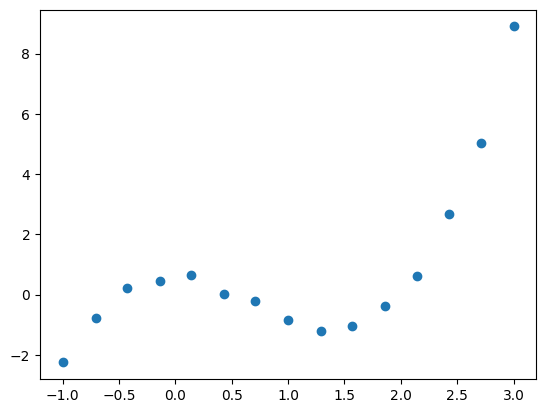

In [324]:
plt.scatter(x, y)
plt.show()

In [325]:
def LeastSquares(x, y, m):
    A = np.zeros(shape=(m + 1, m + 1))
    b = np.zeros(shape=(m + 1))
    for i in range(m + 1):
        for j in range(m + 1):
            if i + j == 0:
                A[i, j] = np.sum(np.ones_like(x))
            else:
                A[i, j] = np.sum(np.power(x, i + j))
        if i == 0:
            b[i] = np.sum(y)
        else:
            b[i] = np.sum(np.power(x, i) * y)
    return np.linalg.inv(A) @ b


In [326]:
def P(x, a):
    n = np.size(x)
    m = np.size(a)
    y = np.zeros_like(x)
    for k, a_k in enumerate(a):
        if k == 0:
            y += a_k
        else:
            y += a_k * np.power(x, k)
    return y

$$ \sigma_{m} = \sqrt{\frac{1}{n - m} \sum\limits_{k = 0}^{n}{\left( P_{m}(x_{k}) - y_{k} \right)^{2}}} $$ 

In [327]:
def S(x, y, a):
    return np.sum(np.power(P(x, a) - y, 2))

def Sigma(x, y, m):
    n = np.size(x)
    a = LeastSquares(x, y, m)
    s = S(x, y, a)
    return np.sqrt(s / (n - m))

In [328]:
s = np.zeros(5)
for m in range(5):
    s[m] = Sigma(x, y, m)

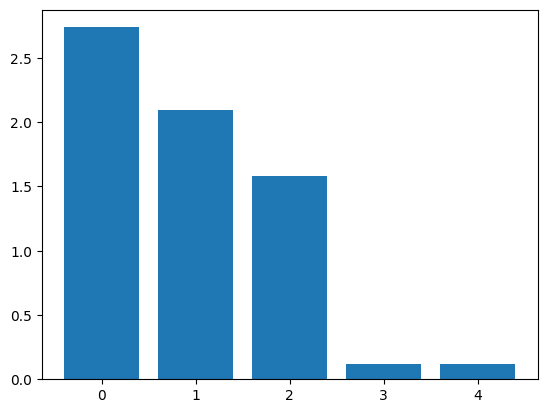

In [329]:
plt.bar(x=np.arange(5), height=s)
plt.show()

0 112.43069333333334 [0.79066667]
1 61.20904288868798 [-0.70917702  1.49884446]
2 32.525737825223885 [-1.23891371 -0.55422089  1.02491417]
3 0.17390682044705139 [ 0.51019613 -0.2592553  -2.03753252  1.01964197]


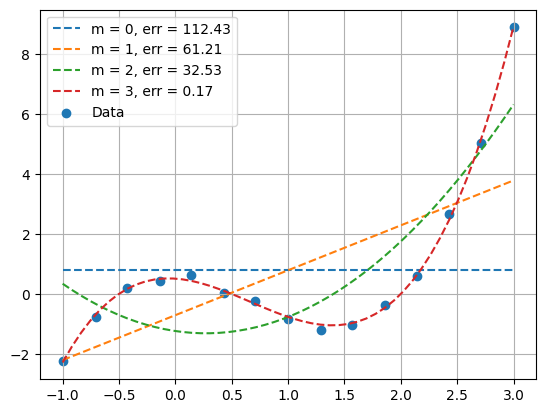

In [330]:
for m in [0, 1, 2, 3]:
    low = LeastSquares(x, y, m)
    error = S(x, y, low)
    print(m, error, low)
    x_linspace = np.linspace(x.min(), x.max())
    plt.plot(x_linspace, P(x_linspace, low), linestyle='dashed', label=f'm = {m}, err = {np.round(S(x, y, low), 2)}')
plt.scatter(x, y, label='Data')
# plt.xticks(x)
# plt.yticks(y)
plt.grid()
plt.legend()
plt.show()

**Задача №6.2.1**

В таблице приведены результаты наблюдений за перемещением $ x $ материальной точки по оси $ Ох $ в моменты времени $ t \in \left[ t_{0}; T \right] $. Известно, что движение является равномерным и описывается линейной зависимостью $ x(t) = v t + b $. Используя метод наименьших квадратов, определить скорость $ v $ и спрогнозировать положение точки в момент времени $ t = 2 T $. На одном чертеже построить график движения точки и точечный график исходных наблюдений.

In [331]:
t = np.array([1, 1.4, 1.8, 2.6, 3, 3.4, 3.8, 4.2, 4.6, 5.0])
x = np.array([10.60, 18.01, 25.85, 44, 50.64, 60.2, 68.27, 77.77, 84.50, 93.4])

In [332]:
t_0 = np.min(t)
T = np.max(t)

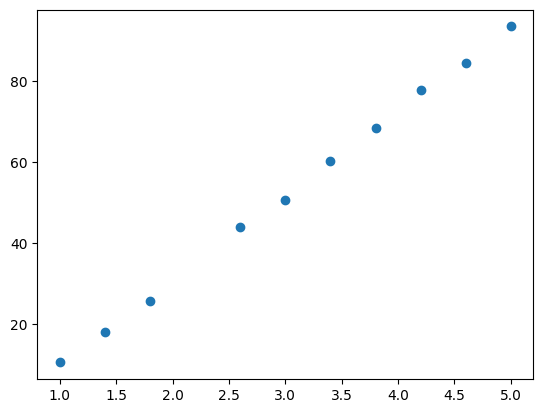

In [333]:
plt.scatter(t, x)
plt.show()

In [334]:
low = LeastSquares(t, x, 1)
val = P(2 * T, low)
print(f'x(2 * T) = {val}')

x(2 * T) = 197.78751893939412


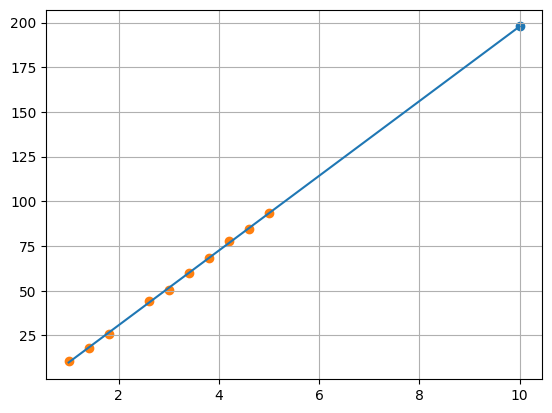

In [335]:
t_linspace = np.linspace(t_0, 2 * T)
plt.plot(t_linspace, P(t_linspace, low)
        #  , label='Linear extrapolation'
         )
plt.scatter(2 * T, val)
plt.scatter(t, x)
plt.grid()
# plt.legend(loc='best')
plt.show()

**Задача №6.6.1.**

Дана функция $ y = f(x) $. Приблизить $ f(x) $ на отрезке $ \left[ a; b \right] $ интерполяционными многочленами Лагранжа 1, 2, 3 степеней. На одном чертеже построить графики приближающих многочленов и функции $ f(x) $. Для многочлена 3 степени сравнить качество приближения при различном выборе узлов интерполяции.

$$
\ell_{i}(x) = 
\frac{
    \left( x - x_{1} \right) 
    \left( x - x_{2} \right) 
    \dots 
    \left( x - x_{j - 1} \right) 
    \left( x - x_{j + 1} \right) 
    \dots 
    \left( x - x_{m - 1} \right) 
    \left( x - x_{m} \right) 
}{
    \left( x_{i} - x_{1} \right) 
    \left( x_{i} - x_{2} \right) 
    \dots 
    \left( x_{i} - x_{j - 1} \right) 
    \left( x_{i} - x_{j + 1} \right) 
    \dots 
    \left( x_{i} - x_{m - 1} \right) 
    \left( x_{i} - x_{m} \right) 
} = 
\prod\limits_{j = 1, \, j \neq i}^{n}{
    \frac
    {
        x - x_{j}
    }
    {
        x_{i} - x_{j}
    }
} 
\implies 
\ell_{i}(x_{j}) = 
\begin{cases}
    0, \, i \neq j, \\
    1, \, i = j.
\end{cases}
$$

$$
f(x) = \sinh{(x)}, \, \left[ a; b \right] = \left[ -3; 3 \right] 
$$

In [269]:
def LagrangePolynomial(x, x_0, n, i):
    y = np.ones_like(x)
    for j in range(n + 1):
        if (i != j):
            y = y * np.divide((x - x_0[j]), (x_0[i] - x_0[j]))
    return y

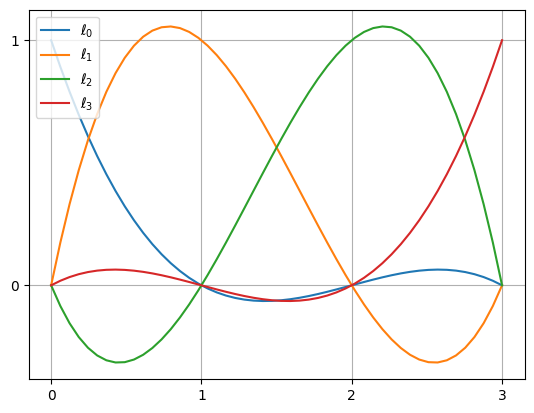

In [270]:
degree = 3
x_nodes = np.linspace(0, degree, endpoint=True, num=degree + 1)
x = np.linspace(0, degree, endpoint=True)

plt.xticks(x_nodes)
plt.yticks([0, 1])

for i in range(degree + 1):
    y = LagrangePolynomial(x, x_nodes, degree, i)
    plt.plot(x, y, label=f'$\ell_{i}$')

plt.legend(loc='upper left')
plt.grid()
plt.show()

In [271]:
def LagrangeInterpolation(x, x_nodes, y_nodes):
    n = np.size(x_nodes) - 1
    y = np.zeros_like(x)
    for i in range(n + 1):
        y += y_nodes[i] * LagrangePolynomial(x, x_nodes, n, i)
    return y

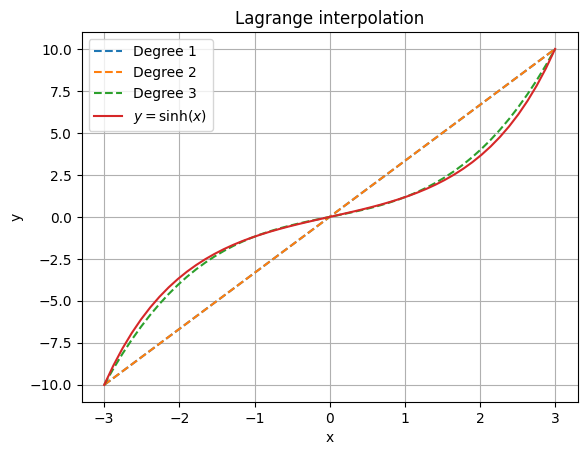

In [273]:
x = np.linspace(-3, 3, endpoint=True)

for n in range(1, 4):
    x_nodes = np.linspace(-3, 3, endpoint=True, num=n + 1)
    y_nodes = np.sinh(x_nodes)

    y = LagrangeInterpolation(x, x_nodes, y_nodes)

    plt.plot(x, y, label=f'Degree {n}', linestyle='--')
    # plt.scatter(x_nodes, y_nodes, label=f'Degree {n} nodes')

plt.plot(x, np.sinh(x), label=f'$ y = \sinh(x) $', linestyle='-')
# plt.legend(loc='lower right')
plt.legend(loc='upper left')
plt.title('Lagrange interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

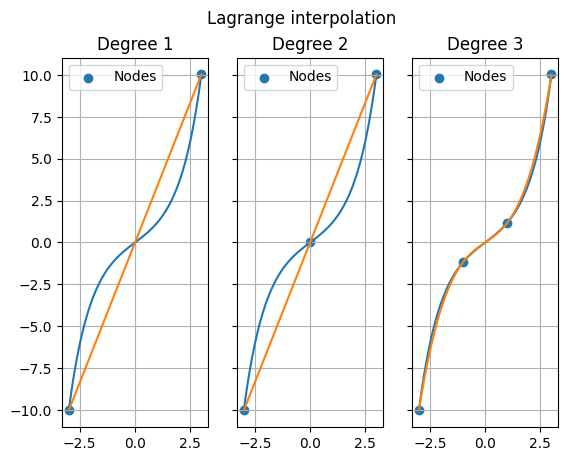

In [275]:
fig, axs = plt.subplots(1, 3)
fig.suptitle('Lagrange interpolation')

x = np.linspace(-3, 3, endpoint=True)
y = np.sinh(x)

for i, d in enumerate([1, 2, 3]):
    axs[i].set_title(f'Degree {d}')

    x_nodes = np.linspace(-3, 3, endpoint=True, num=d + 1)
    y_nodes = np.sinh(x_nodes)

    y_lagrange = LagrangeInterpolation(x, x_nodes, y_nodes)

    axs[i].plot(
        x, y
        # , label=f'Degree {n} interpolation'
        # , linestyle='--'
    )

    axs[i].plot(
        x, y_lagrange
        # , label=f'Degree {n} interpolation'
        # , linestyle='--'
    )

    axs[i].scatter(
        x_nodes, y_nodes, label=f'Nodes'
    )

    axs[i].legend(
        loc='upper left'
    )

    # axs[i].set(xticks=x_nodes, yticks=y_nodes)
    axs[i].label_outer()
    axs[i].grid()

plt.show()

**Задача №6.8.1**

Дана функция $ y = f(x) $. Приблизить $ f(x) $ методом глобальной интерполяции при равномерном и чебышевском распределениях узлов интерполяции. Сравнить качество приближения.

In [337]:
x = np.linspace(-np.pi, np.pi, num=1000)
y = np.cos(np.power(x, 2))

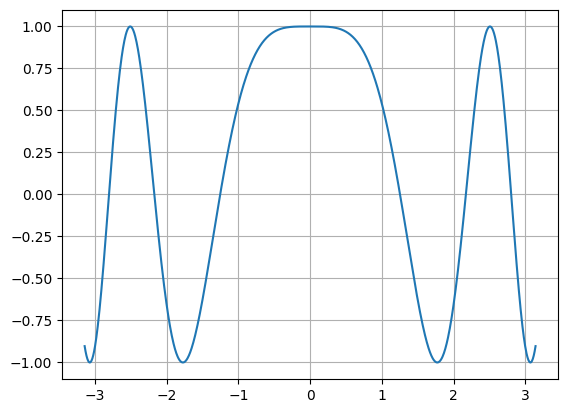

In [338]:
plt.plot(x, y)
plt.grid()
plt.show()

In [339]:
def f(x):
    return np.cos(np.power(x, 2))

In [340]:
a = -np.pi
b = np.pi

In [341]:
x = np.linspace(a, b)
y = f(x)

In [342]:
def uniform_nodes(low, high, num):
    return np.linspace(start=low, stop=high, num=num)

def chebyshev_nodes(low, high, num):
    return (low + high) / 2 + (high - low) / 2 * np.cos(np.pi * (2 * np.arange(num) + 1) / (2 * num))

In [343]:
for k in [5]:
    uni_nodes = uniform_nodes(a, b, k)
    uni_pts = uniform_nodes(a, b, 3 * k)
    uni_vals = LagrangeInterpolation(uni_pts, uni_nodes, )

    ch_nodes = chebyshev_nodes(a, b, k)
    ch_pts = chebyshev_nodes(a, b, 3 * k)

    ch_vals = LagrangeInterpolation()

TypeError: LagrangeInterpolation() missing 1 required positional argument: 'y_nodes'

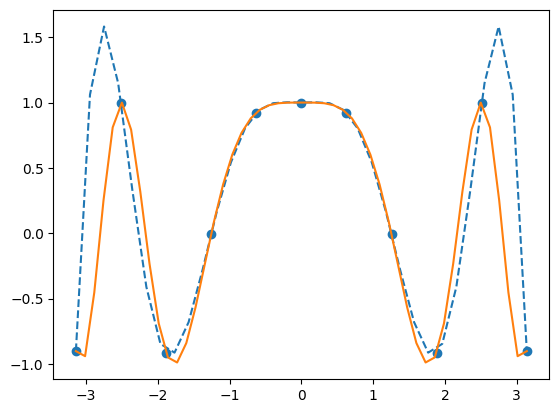

In [344]:
k = 11
uni_nodes = uniform_nodes(a, b, k)
uni_nodes_y = f(uni_nodes)
uni_pts = uniform_nodes(a, b, 3 * k)
uni_vals = LagrangeInterpolation(uni_pts, uni_nodes, uni_nodes_y)
plt.plot(uni_pts, uni_vals, linestyle='--')
plt.plot(x, y, linestyle='-')
plt.scatter(uni_nodes, uni_nodes_y)
plt.show()

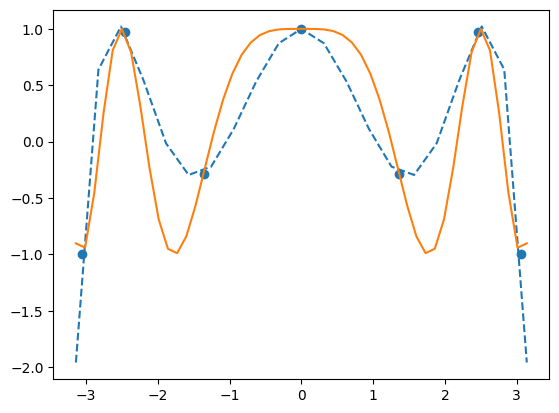

In [315]:
k = 7
ch_nodes = chebyshev_nodes(a, b, k)
ch_nodes_y = f(ch_nodes)
ch_pts = uniform_nodes(a, b, 3 * k)
ch_vals = LagrangeInterpolation(ch_pts, ch_nodes, ch_nodes_y)
plt.plot(ch_pts, ch_vals, linestyle='--')
plt.plot(x, y, linestyle='-')
plt.scatter(ch_nodes, ch_nodes_y)
plt.show()

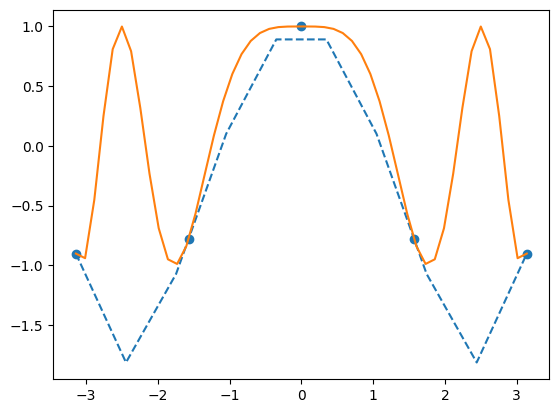

In [316]:
k = 5
uni_nodes = uniform_nodes(a, b, k)
uni_nodes_y = f(uni_nodes)
uni_pts = uniform_nodes(a, b, 2 * k)
uni_vals = LagrangeInterpolation(uni_pts, uni_nodes, uni_nodes_y)
plt.plot(uni_pts, uni_vals, linestyle='--')
plt.plot(x, y, linestyle='-')
plt.scatter(uni_nodes, uni_nodes_y)
plt.show()

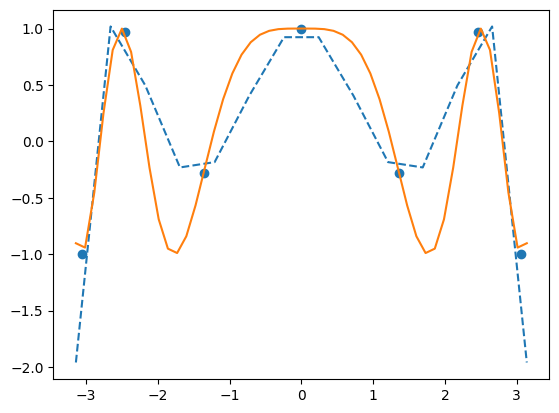

In [317]:
k = 7
ch_nodes = chebyshev_nodes(a, b, k)
ch_nodes_y = f(ch_nodes)
ch_pts = uniform_nodes(a, b, 2 * k)
ch_vals = LagrangeInterpolation(ch_pts, ch_nodes, ch_nodes_y)
plt.plot(ch_pts, ch_vals, linestyle='--')
plt.plot(x, y, linestyle='-')
plt.scatter(ch_nodes, ch_nodes_y)
plt.show()

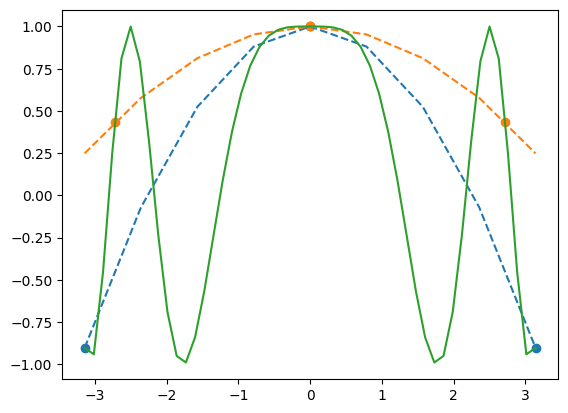

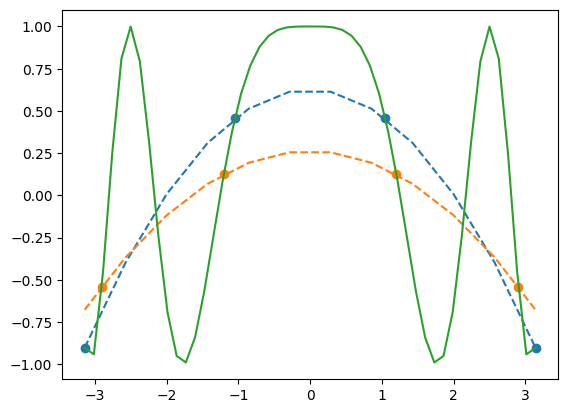

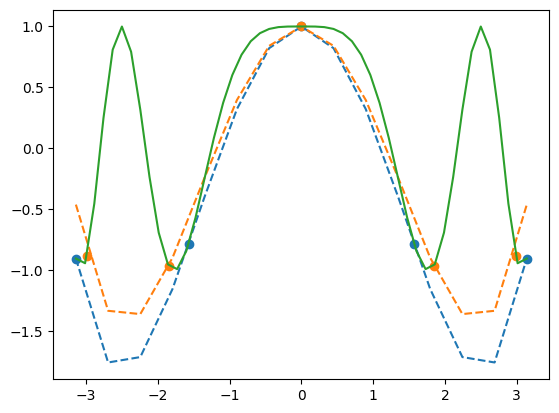

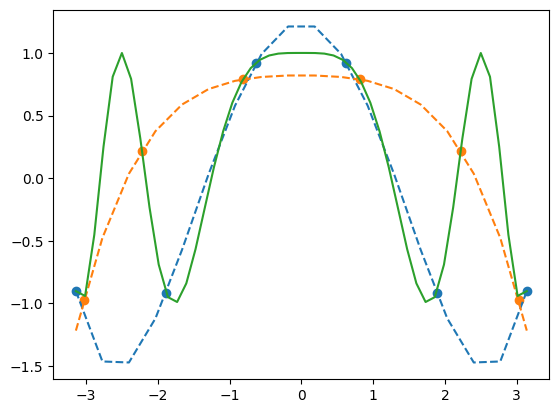

In [322]:
for k in range(3, 7):
    uni_nodes = uniform_nodes(a, b, k)
    uni_nodes_y = f(uni_nodes)
    uni_pts = uniform_nodes(a, b, 3 * k)
    uni_vals = LagrangeInterpolation(uni_pts, uni_nodes, uni_nodes_y)

    plt.plot(uni_pts, uni_vals, linestyle='--')
    plt.scatter(uni_nodes, uni_nodes_y)

    ch_nodes = chebyshev_nodes(a, b, k)
    ch_nodes_y = f(ch_nodes)
    ch_pts = uniform_nodes(a, b, 3 * k)
    ch_vals = LagrangeInterpolation(ch_pts, ch_nodes, ch_nodes_y)

    plt.plot(ch_pts, ch_vals, linestyle='--')
    plt.scatter(ch_nodes, ch_nodes_y)

    plt.plot(x, y, linestyle='-')
    plt.show()